In [ ]:
"""
To 


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
import datajoint_utils as du

INFO - 2021-01-08 18:50:33,596 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-08 18:50:33,598 - settings - Setting database.user to celiib
INFO - 2021-01-08 18:50:33,598 - settings - Setting database.password to newceliipass
INFO - 2021-01-08 18:50:33,602 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-08 18:50:33,603 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-08 18:50:33,616 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-08 18:50:33,829 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-08 18:50:33,917 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-08 18:50:34,140 - settings - Setting enable_python_native_blobs to True


# Inspecting Decimation

In [ ]:
minnie.MultiSomaProofread2()

In [ ]:
minnie.MultiSomaProofread2.proj()

In [ ]:
minnie.MultiSomaProofread2.proj() - minnie.Mesh.proj()

In [ ]:
minnie.Decimation() & minnie.MultiSomaProofread2.proj()

In [ ]:
(schema.jobs & "table_name='__baylor_segment_centroid'")#.delete()

In [ ]:
schema.external['somas'].delete(delete_external_files=True)

# Inspecting Soma Extraction

In [ ]:
minnie.BaylorSegmentCentroid()

In [ ]:
segment_id = np.unique(minnie.BaylorSegmentCentroid.fetch("segment_id"))
segment_id

In [ ]:
import numpy as np

In [ ]:
np.inf/4 < 12

In [ ]:
minnie.BaylorSegmentCentroid() & "multiplicity=0"

In [ ]:
len(segment_id)

In [ ]:
curr_index = 95
curr_segment_id = segment_id[curr_index]
curr_table = minnie.BaylorSegmentCentroid() & dict(segment_id=curr_segment_id)
curr_table

In [ ]:
minnie.MultiSomaProofread2 & dict(segment_id=curr_segment_id)

In [ ]:
import neuron_visualizations as nviz
nviz.plot_objects(meshes=du.get_seg_extracted_somas(curr_segment_id),
                 meshes_colors="random")

In [ ]:
print(f"number of somas = {np.unique(curr_table.fetch('multiplicity'))[0]}")
du.plot_decimated_mesh_with_somas(curr_segment_id)

In [ ]:
from importlib import reload
du = reload(du)

In [ ]:
nviz.plot_objects(du.fetch_undecimated_segment_id_mesh(864691135345134239))

In [ ]:
import numpy as np
np.unique((minnie.BaylorSegmentCentroid & "segment_id=864691135210051520").fetch("ver"))[0]

In [ ]:
(schema.jobs & "table_name='__baylor_segment_centroid'") & "status='error'"

In [ ]:
((schema.jobs & "table_name='__baylor_segment_centroid'") ).delete()#& "status='error'").fetch("key")#.delete()

In [ ]:
print((schema.jobs & "key_hash = '7d2b393cf9636f6c0b4c6af25915ab9f'").fetch1("error_stack"))

In [ ]:
minnie.BaylorSegmentCentroid()

In [ ]:
import datajoint as dj
m65mat = dj.create_virtual_module('m65mat', 'microns_minnie65_materialization')
m65mat.Materialization.describe()

In [ ]:
schema.external['somas'].delete(delete_external_files=True)

In [ ]:
m65mat.Materialization()

In [ ]:
minnie.MultiSomaProofread2.proj() - (dj.U("segment_id") & minnie.BaylorSegmentCentroid()).proj()

In [ ]:
schema.jobs & "table_name='__baylor_segment_centroid'"

# Inspecting Decomposition

In [ ]:
minnie.Decomposition

In [10]:
minnie.Decomposition() & "n_error_limbs>3"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135012398582,0,0.25,29.00,=BLOB=,1376990,2794781,4,1,4,2,8,330,131,13929332.12258168,4744489.087608502,25208.79,181.248,177.914,503.855,470.905,5197,0.00037309757239364195,15.748484848484848,8746791.671,174,0.0005941607157777246,29.868,251421367265.7805,24448738.045176186,18049.7790599871,28744.410147479375,1444950386.5849454,5996.9728
864691135012571126,0,0.25,29.00,=BLOB=,1405952,2834699,4,4,0,1,8,434,190,14952565.529701162,5950582.376110614,22558.465,138.374,138.374,462.864,403.433,5410,0.000361810820307311,12.465437788018432,8599310.865,213,0.0006291201800855004,25.399,343080427437.90247,35381025.859495796,22944.586115099886,39896.26992486943,1610706232.1028285,18348.506
864691135337796326,0,0.25,29.00,=BLOB=,564914,1164053,4,3,2,3,21,251,62,6049123.641171044,1248750.7203810683,14560.197,100.047,100.047,437.872,414.532,1212,0.0002003596011413928,4.828685258964144,3135492.196,102,0.0003865421835672781,11.882,49955028484.44275,21604523.06666692,8258.225727846424,15932.116988896103,489755181.22002697,5850.0526
864691135373436616,0,0.25,29.00,=BLOB=,1785657,3619863,5,5,1,2,20,494,129,18445793.933226306,4844793.838331169,25974.596,264.538,243.436,470.631,443.913,6676,0.0003619253269426673,13.51417004048583,11972734.25,302,0.0005576002824918627,22.106,297687347090.0846,19022402.5988334,16138.494670802,24863.77304249316,985719692.3512735,8023.5206


In [ ]:
schema.external['decomposition'].delete(delete_external_files=True)

In [62]:
curr_table = (minnie.schema.jobs & "table_name='__decomposition'")
error_table = (curr_table & "status='error'")#.delete()
error_table

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__decomposition,2fce6f814c2680709bb844fc65ac2a5b,error,=BLOB=,"IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices",=BLOB=,celiib@10.28.0.166,at-node39,29,26091,2021-01-08 18:29:01
__decomposition,5f426ed37d3e1f147514d4ee7dc4dc44,error,=BLOB=,ValueError: cannot reshape array of size 1 into shape (3),=BLOB=,celiib@10.28.0.149,at-node22,29,26090,2021-01-08 15:17:47
__decomposition,ba0440fc789ecc27a6dab938fc45073c,error,=BLOB=,IndexError: arrays used as indices must be of integer (or boolean) type,=BLOB=,celiib@10.28.0.149,at-node22,29,26090,2021-01-08 15:44:57
__decomposition,db35bfd59079520da0a94e2df9d27618,error,=BLOB=,ValueError: cannot reshape array of size 1 into shape (3),=BLOB=,celiib@10.28.0.83,at-compute004,29,26071,2021-01-08 15:06:27


In [65]:
print((error_table & "key_hash='2fce6f814c2680709bb844fc65ac2a5b'").fetch1("key"))

{'segment_id': 864691136309708378, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25')}


In [38]:
error_table = ((minnie.schema.jobs & "table_name='__decomposition'") & "status='error'")#.delete()

# Checking the Splitting

In [55]:
minnie,schema = du.configure_minnie_vm()

In [60]:
minnie.NeuronSplitSuggestions()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,split_results will store the results of how to split the limbs of neuron objects,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,=BLOB=,133.4659
864691135012398582,0,0.25,29.00,=BLOB=,919.475
864691135012471798,0,0.25,29.00,=BLOB=,202.4832
864691135012571126,0,0.25,29.00,=BLOB=,232.2368
864691135012905110,0,0.25,29.00,=BLOB=,504.4109
864691135065018692,0,0.25,29.00,=BLOB=,150.1666
864691135065024068,0,0.25,29.00,=BLOB=,252.9081
864691135065032772,0,0.25,29.00,=BLOB=,117.8756
864691135081745143,0,0.25,29.00,=BLOB=,119.0137
864691135155574372,0,0.25,29.00,=BLOB=,225.3073


In [59]:
(schema.jobs & "table_name = '__neuron_split_suggestions'")#.delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,37f37d599b3401007a9d558ba00af3b9,error,=BLOB=,Exception: base_node (101) and upstream_node (103) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,20661,26933,2021-01-09 11:56:37
__neuron_split_suggestions,48030f4c8379789b160b95499aaa9167,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,20451,26930,2021-01-09 11:49:01
__neuron_split_suggestions,4dd8e92876245a9122f32f1cd53ef9e5,error,=BLOB=,Exception: base_node (73) and upstream_node (78) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,20388,26929,2021-01-09 11:46:50
__neuron_split_suggestions,63041654019cecbb682f1bd8390c2f70,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,20451,26930,2021-01-09 12:20:25
__neuron_split_suggestions,8108b82bf073b8a8df317a64031d4049,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,20661,26933,2021-01-09 12:20:49
__neuron_split_suggestions,86dd59ca9173411d1bc7e33c4b971b3a,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,20451,26930,2021-01-09 13:05:08
__neuron_split_suggestions,99a2761d6923d15b08b8e50d0f06b302,error,=BLOB=,Exception: base_node (467) and upstream_node (591) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,20451,26930,2021-01-09 12:09:28
__neuron_split_suggestions,9ff7f1277fc3c60f0efe7cee80dc6c99,error,=BLOB=,Exception: base_node (26) and upstream_node (53) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,20661,26933,2021-01-09 11:49:00
__neuron_split_suggestions,c257e7a0c17dfea86362e58d3ec1ff10,error,=BLOB=,Exception: base_node (7) and upstream_node (10) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,20514,26931,2021-01-09 12:58:22
__neuron_split_suggestions,f27f15a3d0896387e025a5069d0f97c4,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,20514,26931,2021-01-09 11:47:52


In [53]:
minnie.NeuronSplitSuggestions.fetch1("split_results")

{0: [{'starting_node_1': 143,
   'starting_node_2': 144,
   'title': 'S2_0 from S2_1 ',
   'edges_to_delete': [array([174, 181]),
    array([174, 183]),
    array([181, 183])],
   'edges_to_create': [],
   'removed_branches': [],
   'coordinate_suggestions': [array([ 930705.,  712224., 1015230.]),
    array([ 930705.,  712224., 1015230.]),
    array([ 930705.,  712224., 1015230.])],
   'successful_disconnection': True,
   'paths_not_cut': [],
   'paths_cut': [array([[ 911983.01149875,  569417.77721086, 1005259.50394657],
           [ 916758.06315789,  564276.42105263, 1011738.05263158],
           [ 917398.89233793,  570367.25928182, 1019505.47674155],
           [ 919710.        ,  604922.        , 1015320.        ],
           [ 920147.        ,  621348.        , 1018430.        ],
           [ 922673.        ,  638049.        , 1022200.        ],
           [ 928864.34932311,  708517.14520528, 1016787.94282581],
           [ 929783.        ,  676757.        , 1016790.        ],
    

# Saving off the split results (becuase redoing)

In [67]:
split_info = minnie.NeuronSplitSuggestions.fetch(as_dict=True)

In [68]:
import pandas as pd
split_table = pd.DataFrame.from_dict(split_info)
split_table

,segment_id,decimation_version,decimation_ratio,ver,split_results,run_time
0,864691134947393276,0,0.25,29.00,{},133.4659
1,864691135012398582,0,0.25,29.00,"{0: [{'starting_node_1': 86, 'starting_node_2'...",919.4750
2,864691135012471798,0,0.25,29.00,"{0: [{'starting_node_1': 60, 'starting_node_2'...",202.4832
3,864691135012571126,0,0.25,29.00,"{0: [{'starting_node_1': 57, 'starting_node_2'...",232.2368
4,864691135012905110,0,0.25,29.00,"{0: [{'starting_node_1': 55, 'starting_node_2'...",504.4109
...,...,...,...,...,...,...
73,864691136617172443,0,0.25,29.00,"{0: [{'starting_node_1': 66, 'starting_node_2'...",332.5610
74,864691136618586765,0,0.25,29.00,"{2: [{'starting_node_1': 63, 'starting_node_2'...",198.6435
75,864691136723342333,0,0.25,29.00,"{0: [{'starting_node_1': 100, 'starting_node_2...",453.0445
76,864691136723421693,0,0.25,29.00,"{0: [{'starting_node_1': 36, 'starting_node_2'...",108.7810


In [69]:
import system_utils as su
su.compressed_pickle(split_table,"split_table")

Saved object at /notebooks/Auto_Proofreading/Preprocessing_Pipeline/split_table.pbz2
File size is 0.089828 MB


# Saving and Clearing all of the tables so we can redo

In [70]:
minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,1,29,151214,204425,23080,17656,35075,=BLOB=,2,0.817,1.034,3.908,130098.058,1079.3675
864691134947393276,0,0.25,2,29,173477,274062,25589,6338,11187,=BLOB=,2,0.838,1.624,0.084,7230203.524,1079.3675
864691135012398582,0,0.25,1,29,256398,172010,21231,19609,38842,=BLOB=,2,0.885,1.148,3.434,64244.801,737.9046
864691135012398582,0,0.25,2,29,259167,172556,21591,19791,39362,=BLOB=,2,0.844,1.175,3.635,41186.262,737.9046
864691135012471798,0,0.25,1,29,148284,160521,23687,16955,33423,=BLOB=,2,0.847,1.116,2.771,1862859.796,734.9606
864691135012471798,0,0.25,2,29,146267,158654,23600,12195,24040,=BLOB=,2,0.671,1.294,2.831,1463549.909,734.9606
864691135012571126,0,0.25,1,29,144647,135840,22253,35091,70964,=BLOB=,1,0.591,1.623,5.508,312318.315,837.5548
864691135012905110,0,0.25,1,29,179868,177039,16499,27480,54330,=BLOB=,1,0.678,1.3,2.997,2019085.907,516.2576
864691135065018692,0,0.25,1,29,240066,201788,26340,35139,67713,=BLOB=,2,0.794,1.534,5.875,813671.464,535.4707
864691135065018692,0,0.25,2,29,240523,186698,26178,14459,27179,=BLOB=,2,0.642,1.325,5.397,6009566.429,535.4707


In [72]:
col_to_keep_soma = [           
"centroid_x",
"centroid_y",
"centroid_z",
"n_vertices",
"n_faces",
"multiplicity",
"sdf",
"max_side_ratio",
"bbox_volume_ratio",
"max_hole_length",
"run_time",
              ]
minnie.BaylorSegmentCentroid.proj(*col_to_keep_soma)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,1,29,151214,204425,23080,17656,35075,2,0.817,1.034,3.908,130098.058,1079.3675
864691134947393276,0,0.25,2,29,173477,274062,25589,6338,11187,2,0.838,1.624,0.084,7230203.524,1079.3675
864691135012398582,0,0.25,1,29,256398,172010,21231,19609,38842,2,0.885,1.148,3.434,64244.801,737.9046
864691135012398582,0,0.25,2,29,259167,172556,21591,19791,39362,2,0.844,1.175,3.635,41186.262,737.9046
864691135012471798,0,0.25,1,29,148284,160521,23687,16955,33423,2,0.847,1.116,2.771,1862859.796,734.9606
864691135012471798,0,0.25,2,29,146267,158654,23600,12195,24040,2,0.671,1.294,2.831,1463549.909,734.9606
864691135012571126,0,0.25,1,29,144647,135840,22253,35091,70964,1,0.591,1.623,5.508,312318.315,837.5548
864691135012905110,0,0.25,1,29,179868,177039,16499,27480,54330,1,0.678,1.3,2.997,2019085.907,516.2576
864691135065018692,0,0.25,1,29,240066,201788,26340,35139,67713,2,0.794,1.534,5.875,813671.464,535.4707
864691135065018692,0,0.25,2,29,240523,186698,26178,14459,27179,2,0.642,1.325,5.397,6009566.429,535.4707


In [73]:
soma_saved_data = minnie.BaylorSegmentCentroid.proj(*col_to_keep_soma).fetch(as_dict=True)
new_data_frame_soma = pd.DataFrame.from_dict(soma_saved_data)
new_data_frame_soma

,segment_id,decimation_version,decimation_ratio,soma_index,ver,centroid_x,centroid_y,centroid_z,n_vertices,n_faces,multiplicity,sdf,max_side_ratio,bbox_volume_ratio,max_hole_length,run_time
0,864691134947393276,0,0.25,1,29,151214.0,204425.0,23080.0,17656,35075,2,0.817,1.034,3.908,130098.058,1079.3675
1,864691134947393276,0,0.25,2,29,173477.0,274062.0,25589.0,6338,11187,2,0.838,1.624,0.084,7230203.524,1079.3675
2,864691135012398582,0,0.25,1,29,256398.0,172010.0,21231.0,19609,38842,2,0.885,1.148,3.434,64244.801,737.9046
3,864691135012398582,0,0.25,2,29,259167.0,172556.0,21591.0,19791,39362,2,0.844,1.175,3.635,41186.262,737.9046
4,864691135012471798,0,0.25,1,29,148284.0,160521.0,23687.0,16955,33423,2,0.847,1.116,2.771,1862859.796,734.9606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,864691137196946497,0,0.25,2,29,273074.0,101652.0,24725.0,1341,2070,3,0.921,5.586,-0.025,1638535.107,2445.4786
352,864691137196946497,0,0.25,3,29,273187.0,96066.0,23989.0,11339,22884,3,0.663,2.250,-0.020,6541269.506,2445.4786
353,864691137196956993,0,0.25,1,29,262618.0,173243.0,26234.0,22538,44166,3,0.904,1.199,3.310,351599.886,842.3018
354,864691137196956993,0,0.25,2,29,258147.0,110664.0,25232.0,19554,36920,3,0.784,1.364,3.019,2193497.744,842.3018


In [74]:
su.compressed_pickle(new_data_frame_soma,"BaylorSegmentCentroid_saved_1_9")

Saved object at /notebooks/Auto_Proofreading/Preprocessing_Pipeline/BaylorSegmentCentroid_saved_1_9.pbz2
File size is 0.017654 MB


In [78]:
minnie.BaylorSegmentCentroid().delete()

About to delete:
`microns_minnie65_02`.`__baylor_segment_centroid`: 356 items
Proceed? [yes, No]: yes
Committed.


In [79]:
schema.external['somas'].delete(delete_external_files=True)

100%|██████████| 356/356 [00:05<00:00, 68.17it/s]


[]

In [116]:
(schema.jobs & "table_name='__baylor_segment_centroid'")

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__baylor_segment_centroid,00471f14c125b842baffaf6ebff1eed1,error,=BLOB=,TypeError: object of type 'NoneType' has no len(),=BLOB=,celiib@10.28.0.137,at-node10,29,27280,2021-01-09 23:45:26
__baylor_segment_centroid,006d4a754852db78637a9730066c3558,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.134,at-node7,29,27283,2021-01-09 23:41:45
__baylor_segment_centroid,0de9544238e2741166282bce76c5b67b,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.137,at-node10,29,27280,2021-01-09 23:45:26
__baylor_segment_centroid,0e0a23b50c00948d31c0e936b968e570,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.152,at-node25,29,27273,2021-01-09 23:39:13
__baylor_segment_centroid,100e0bca8e832cdc1773ba49cd85c20d,error,=BLOB=,TypeError: object of type 'NoneType' has no len(),=BLOB=,celiib@10.28.0.168,at-node41,29,27261,2021-01-09 23:29:22
__baylor_segment_centroid,12dc98a8b9a21eadf99f39bdbf6efd06,error,=BLOB=,AxisError: axis 1 is out of bounds for array of dimension 1,=BLOB=,celiib@10.28.0.136,at-node9,29,27272,2021-01-09 23:41:54
__baylor_segment_centroid,199727e7563f1791c7d099384821361b,error,=BLOB=,TypeError: object of type 'NoneType' has no len(),=BLOB=,celiib@10.28.0.136,at-node9,29,27272,2021-01-09 23:54:15
__baylor_segment_centroid,1c7677a63d052676dc2a5d0e819b9425,error,=BLOB=,TypeError: object of type 'NoneType' has no len(),=BLOB=,celiib@10.28.0.145,at-node18,29,27277,2021-01-09 23:52:45
__baylor_segment_centroid,1f44883a32a9da75ad1f2c4ba2ed22b5,error,=BLOB=,TypeError: object of type 'NoneType' has no len(),=BLOB=,celiib@10.28.0.128,at-node1,30,27274,2021-01-09 23:32:40
__baylor_segment_centroid,223292d754d01c10ec97cae17b086998,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.165,at-node38,29,27284,2021-01-09 23:24:59


In [113]:
(schema.jobs & "table_name='__baylor_segment_centroid'") & 'error_message ="TypeError: object of type \'Trimesh\' has no len()"'

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__baylor_segment_centroid,7ace5719b08be0bd74ce39a64a2e8170,error,=BLOB=,TypeError: object of type 'Trimesh' has no len(),=BLOB=,celiib@10.28.0.167,at-node40,30,27258,2021-01-09 23:35:08
__baylor_segment_centroid,86d93ed55e0b6413ecba6b597ce7eab3,error,=BLOB=,TypeError: object of type 'Trimesh' has no len(),=BLOB=,celiib@10.28.0.152,at-node25,29,27273,2021-01-09 23:39:13
__baylor_segment_centroid,cae2c91d30706723ef8952e4cd00a0c8,error,=BLOB=,TypeError: object of type 'Trimesh' has no len(),=BLOB=,celiib@10.28.0.137,at-node10,29,27280,2021-01-09 23:30:03


In [109]:
nu.all_unique_choose_2_combinations(np.arange(5))

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 3],
       [2, 4],
       [3, 4]])

In [117]:
print((schema.jobs & "table_name='__baylor_segment_centroid'" & 'key_hash="00471f14c125b842baffaf6ebff1eed1"').fetch1("error_stack"))

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/datajoint/autopopulate.py", line 159, in populate
    make(dict(key))
  File "3_BaylorSegmentCentroid_multi_proofreading.py", line 218, in make
    n_nuclei_faces = len(glia_faces)
TypeError: object of type 'NoneType' has no len()



# Getting a histogram of the somas

In [84]:
import matplotlib.pyplot as plt
soma_faces_array = new_data_frame_soma["n_faces"].to_numpy()
soma_faces_array_filtered = soma_faces_array[soma_faces_array!=0]
soma_faces_array_filtered

array([35075, 11187, 38842, 39362, 33423, 24040, 70964, 54330, 67713,
       27179, 87890, 31199, 46198, 32570, 28674, 28557, 32041, 31226,
       39491, 25662, 33720, 35264, 26627, 42779, 37318, 31072, 28321,
       43036, 15991,  2032,  1619,  3273, 27161, 27300, 32518, 32785,
       25238, 23489, 26139, 46993, 14317, 70264, 43992, 72856, 35465,
       30468, 33662, 35873, 28230,  3018, 38321, 55843, 97909, 40898,
       24458, 44064,  2728, 61496, 33005, 74225, 30097,  7582, 24963,
       30160, 27066, 26788, 29718, 40211, 67511, 26526, 41395, 32745,
       29768, 66119,  6207,  5974, 14526, 28914, 31134, 35870, 35647,
       49533, 43430, 28929, 37825, 42428, 45573, 25112, 28343, 35083,
       24779,  4231, 36931, 40146, 28100, 62404, 44707, 26044, 35636,
       27364, 36693, 28935, 34260, 35571, 56072, 24672, 25016, 37448,
       37164, 29466, 59203, 29848, 41571, 56930, 39030, 11164, 26598,
       32920, 24272, 29171, 12025, 35540, 52889, 55434, 41617, 23965,
       35461, 25138,

(array([ 3., 10.,  5.,  4.,  0.,  4.,  3.,  1.,  1.,  0.,  4.,  1.,  2.,
         3.,  2.,  1.,  0.,  3.,  0.,  3.,  1.,  2.,  6.,  6., 17.,  8.,
        17.,  9., 22.,  9.,  9., 15., 19., 13.,  8., 20.,  4., 14.,  4.,
         9.,  4.,  7.,  5.,  7.,  7.,  5.,  3.,  3.,  2.,  1.,  1.,  3.,
         2.,  3.,  0.,  2.,  3.,  3.,  1.,  1.,  2.,  2.,  2.,  3.,  1.,
         1.,  1.,  2.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1051.  ,  2019.58,  2988.16,  3956.74,  4925.32,  5893.9 ,
         6862.48,  7831.06,  8799.64,  9768.22, 10736.8 , 11705.38,
        12673.96, 13642.54, 14611.12, 15579.7 , 16548.28, 17516.86,
        18485.44, 19454.02, 20422.6 , 21391.18, 22359.76, 23328.34,
        24296.92, 25265.5 , 26234.08, 27202.66, 28171.24, 29139.82,
        30108.4 , 31076.98, 32045.56, 33014.14, 33982.72, 34951.3 ,
        35919.88, 36888.46

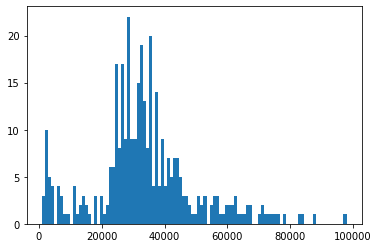

In [86]:
plt.hist(soma_faces_array_filtered,bins=100)

In [87]:
import numpy_utils as nu

[autoreload of trimesh_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/trimesh_utils.py", line 1024
    pairs_to_test = nu.
            

In [119]:
minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,1,29.00,151222,204439,23079,17536,34858,=BLOB=,4,0.804,1.125,3.74,128233.682,560.7779
864691134947393276,0,0.25,2,29.00,173930,273848,25605,4386,7890,=BLOB=,4,0.811,1.665,0.033,3225504.45,560.7779
864691134947393276,0,0.25,3,29.00,171339,271350,26236,6291,9916,=BLOB=,4,0.54,1.683,-0.025,4115977.193,560.7779
864691134947393276,0,0.25,4,29.00,171288,271799,25886,2595,4449,=BLOB=,4,0.467,1.481,-0.016,2351076.19,560.7779


In [120]:
minnie,schema = du.configure_minnie_vm()

In [121]:
minnie.NeuronGliaNuclei()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia,n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei
864691134947393276,0,0.25,29.00,0,=BLOB=,34,=BLOB=


In [124]:
curr_seg_id = 864691134947393276

In [126]:
nuclei_faces = (minnie.NeuronGliaNuclei() & f"segment_id={curr_seg_id}").fetch1("nuclei_faces")

In [122]:
current_neuron_mesh = du.fetch_segment_id_mesh(864691134947393276)

In [128]:
nuclei_mesh = current_neuron_mesh.submesh([nuclei_faces],append=True,repair=False)
nuclei_mesh

<trimesh.Trimesh(vertices.shape=(279524, 3), faces.shape=(503710, 3))>

In [129]:
nviz.plot_objects(nuclei_mesh)

In [136]:
soma_meshes = np.array(du.get_seg_extracted_somas(curr_seg_id))
soma_meshes

array([<trimesh.Trimesh(vertices.shape=(17536, 3), faces.shape=(34858, 3))>,
       <trimesh.Trimesh(vertices.shape=(4386, 3), faces.shape=(7890, 3))>,
       <trimesh.Trimesh(vertices.shape=(6291, 3), faces.shape=(9916, 3))>,
       <trimesh.Trimesh(vertices.shape=(2595, 3), faces.shape=(4449, 3))>],
      dtype=object)

In [139]:
nviz.plot_objects(meshes=soma_meshes[3:4])

In [141]:
minnie.NeuronGliaNuclei()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia,n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei
864691134947393276,0,0.25,29.00,0,=BLOB=,34,=BLOB=
864691135012398582,0,0.25,29.00,0,=BLOB=,31,=BLOB=
864691135012471798,0,0.25,29.00,0,=BLOB=,19,=BLOB=
864691135012571126,0,0.25,29.00,0,=BLOB=,23,=BLOB=
864691135012905110,0,0.25,29.00,0,=BLOB=,14,=BLOB=
864691135065018692,0,0.25,29.00,0,=BLOB=,20,=BLOB=


In [142]:
minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,1,29.00,151222,204439,23079,17536,34858,=BLOB=,4,0.804,1.125,3.74,128233.682,560.7779
864691134947393276,0,0.25,2,29.00,173930,273848,25605,4386,7890,=BLOB=,4,0.811,1.665,0.033,3225504.45,560.7779
864691134947393276,0,0.25,3,29.00,171339,271350,26236,6291,9916,=BLOB=,4,0.54,1.683,-0.025,4115977.193,560.7779
864691134947393276,0,0.25,4,29.00,171288,271799,25886,2595,4449,=BLOB=,4,0.467,1.481,-0.016,2351076.19,560.7779
864691135012398582,0,0.25,1,29.00,256407,171982,21230,19735,39140,=BLOB=,2,0.888,1.153,3.499,49941.917,357.5716
864691135012398582,0,0.25,2,29.00,259165,172557,21593,19455,38641,=BLOB=,2,0.853,1.161,3.488,57953.776,357.5716
864691135012471798,0,0.25,1,29.00,148283,160554,23686,16557,32667,=BLOB=,2,0.84,1.248,2.692,1471657.457,325.3733
864691135012471798,0,0.25,2,29.00,146262,158659,23600,12293,24221,=BLOB=,2,0.671,1.31,2.894,1494468.27,325.3733
864691135012571126,0,0.25,1,29.00,144652,135831,22252,35374,71527,=BLOB=,1,0.689,1.791,4.814,295958.709,419.8058
864691135012905110,0,0.25,1,29.00,179891,177067,16495,29364,57844,=BLOB=,1,0.688,1.417,3.34,3097180.627,251.5587


In [143]:
minnie.BaylorSegmentCentroid

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,volume the volume in billions (10*9 nm^3) of the convex hull,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,1,29.00,151224,204444,23078,17625,35002,=BLOB=,1,0.818,1421.641799562763,1.152,4.088,120399.808,269.8494
864691135012398582,0,0.25,1,29.00,256407,171982,21230,19735,39140,=BLOB=,2,0.888,1409.1490288781977,1.153,3.499,49941.917,359.569
864691135012398582,0,0.25,2,29.00,259165,172557,21593,19455,38641,=BLOB=,2,0.853,1288.1463413922552,1.161,3.488,57953.776,359.569


In [145]:
minnie.NeuronGliaNuclei()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia,n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei
864691134947393276,0,0.25,29.00,1617546,=BLOB=,0,=BLOB=
864691135012398582,0,0.25,29.00,0,=BLOB=,31,=BLOB=
864691135012471798,0,0.25,29.00,0,=BLOB=,19,=BLOB=
864691135012571126,0,0.25,29.00,0,=BLOB=,23,=BLOB=
864691135012905110,0,0.25,29.00,0,=BLOB=,14,=BLOB=
864691135065018692,0,0.25,29.00,0,=BLOB=,20,=BLOB=
864691135065024068,0,0.25,29.00,0,=BLOB=,3,=BLOB=
864691135065032772,0,0.25,29.00,0,=BLOB=,19,=BLOB=
864691135065033540,0,0.25,29.00,0,=BLOB=,10,=BLOB=
864691135081745143,0,0.25,29.00,0,=BLOB=,13,=BLOB=


In [150]:
from importlib import reload
du = reload(du)

In [156]:
du.plot_decimated_mesh_with_somas(864691135012398582)

Segment_id = 864691135012398582
vertices = 1376990, faces= = 2794781
No glia to plot
subtracting glia and nuclei
